# All the analysis has been done on the new export data tables

# A. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# 0. Reading and preparing the dataset

In [3]:
#read the data
woundassessment=pd.read_csv("tbl_WoundAssessment.csv",sep="|", low_memory=False)
#View the data
woundassessment

,WoundAssessmentID,DocumentID,WoundAssessmentNum,WoundID,WoundNumber,Length,Width,Depth,TunnelingOrUndermining,TunnelingUnderminingDistance,...,MuscleNecrosisExposed,JointNecrosisExposed,BoneNecrosisExposed,CapsuleNecrosisExposed,AdiposeExposed,AdiposeNecrosisExposed,PainPatientIsNotEligible,PainPatientIsNotEligibleReason,PainPatientIsNotEligibleReasonOther,IsTissueAnalyticsAssessment
0,56472004,414523311,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,56472043,414523850,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
2,56472073,414524131,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
3,56577198,416732515,NaN,14280880,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
4,56577265,416733814,NaN,14280880,NaN,20.0,20.0,20.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356431,107333477,1076469722,NaN,27074272,NaN,7.0,8.7,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356432,107333508,1076469997,NaN,27074281,NaN,10.6,10.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356433,107333519,1076470093,NaN,27074281,NaN,10.6,10.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356434,107333529,1076470211,NaN,27074281,NaN,9.8,9.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True


### Check if the dataframe is ragged or not

In [4]:
print("Number of columns in the dataframe:",woundassessment.shape[1])
print("Number of rows in the dataframe:",len(woundassessment.index))
print("Number of cells in the dataframe:",woundassessment.size)

print("Is the dataframe complete?", woundassessment.shape[1]*len(woundassessment.index)==woundassessment.size)

Number of columns in the dataframe: 301
Number of rows in the dataframe: 356436
Number of cells in the dataframe: 107287236
Is the dataframe complete? True


In [5]:
woundassessment=woundassessment.drop_duplicates()
woundassessment

,WoundAssessmentID,DocumentID,WoundAssessmentNum,WoundID,WoundNumber,Length,Width,Depth,TunnelingOrUndermining,TunnelingUnderminingDistance,...,MuscleNecrosisExposed,JointNecrosisExposed,BoneNecrosisExposed,CapsuleNecrosisExposed,AdiposeExposed,AdiposeNecrosisExposed,PainPatientIsNotEligible,PainPatientIsNotEligibleReason,PainPatientIsNotEligibleReasonOther,IsTissueAnalyticsAssessment
0,56472004,414523311,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,56472043,414523850,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
2,56472073,414524131,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
3,56577198,416732515,NaN,14280880,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
4,56577265,416733814,NaN,14280880,NaN,20.0,20.0,20.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356431,107333477,1076469722,NaN,27074272,NaN,7.0,8.7,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356432,107333508,1076469997,NaN,27074281,NaN,10.6,10.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356433,107333519,1076470093,NaN,27074281,NaN,10.6,10.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356434,107333529,1076470211,NaN,27074281,NaN,9.8,9.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True


## Keeping only the required columns that we need for the analysis

In [6]:
woundassessment1=woundassessment[["DocumentID","WoundID","Length","Width","Depth"]]
woundassessment1=woundassessment1.drop_duplicates()
woundassessment1

,DocumentID,WoundID,Length,Width,Depth
0,414523311,14280880,20.0,20.0,5.0
1,414523850,14280880,20.0,20.0,5.0
2,414524131,14280880,20.0,20.0,5.0
3,416732515,14280880,NaN,NaN,NaN
4,416733814,14280880,20.0,20.0,20.0
...,...,...,...,...,...
356431,1076469722,27074272,7.0,8.7,5.0
356432,1076469997,27074281,10.6,10.1,5.0
356433,1076470093,27074281,10.6,10.1,5.0
356434,1076470211,27074281,9.8,9.1,5.0


## the woundmeasurement values are in mm, thus changing those to cm for our analysis

In [7]:
woundassessment2=pd.DataFrame()
woundassessment2["DocumentID"]=woundassessment1.loc[:,("DocumentID")]
woundassessment2["WoundID"]=woundassessment1.loc[:,("WoundID")]
woundassessment2["Length"]=woundassessment1.loc[:,("Length")]/10
woundassessment2["Width"]=woundassessment1.loc[:,("Width")]/10
woundassessment2["Depth"]=woundassessment1.loc[:,("Depth")]/10
woundassessment2.head()

,DocumentID,WoundID,Length,Width,Depth
0,414523311,14280880,2.0,2.0,0.5
1,414523850,14280880,2.0,2.0,0.5
2,414524131,14280880,2.0,2.0,0.5
3,416732515,14280880,NaN,NaN,NaN
4,416733814,14280880,2.0,2.0,2.0


## Adding the dates directing from the DocumentLibrary table

In [8]:
#This is the dataframe that we need to get the dates for each of the woundassessments
documentlibrary=pd.read_csv("tbl_DocumentLibrary.csv",sep="|",low_memory=False)
documentlibrary=documentlibrary.drop_duplicates()
documentlibrary

,DocumentID,DocumentType,Title,VisitID,PatientID,ParentDocumentID,DocumentDate,PhysicianID,ClinicianID,SecondClinicianID,...,SupervisingPhysicianID,ThirdProviderId,DepartmentID,JobClassID,DivisionID,LocationID,CompanyID,TimeZoneId,DateAddedUtc,HoursFromPittsburgh
0,430693544,WoundAssessmentDocument,Wound Assessment (Wound #3 Foot (mid)),59578356.0,5978401.0,4.439694e+08,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,430692379,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Proximal, La...",59578356.0,5978401.0,4.829236e+08,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,430690523,MedicalHistoryDocument,Medical History,59578356.0,5978401.0,NaN,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,430690439,SocialHistoryDocument,Social History,59578356.0,5978401.0,NaN,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,430690370,FamilyHistoryDocument,Family History,59578356.0,5978401.0,NaN,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557474,1076253331,PhysicianOrdersDocument,Physician Orders,114676936.0,10175948.0,NaN,1/11/2023 12:00:00 AM,2525617.0,69799.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3557475,1076252926,NPWTMaintenanceDocument,Negative Pressure Wound Therapy Maintenance (N...,114676936.0,10175948.0,1.074552e+09,1/11/2023 12:00:00 AM,2525617.0,69799.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Standard Time,1/11/2023 3:06:05 PM,0.0
3557476,1076248512,SuperBillDocument,SuperBill,114711559.0,9935079.0,NaN,1/10/2023 12:00:00 AM,2525617.0,70322.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3557477,1076495552,ROSDocument,Review of Systems,114622592.0,9801314.0,NaN,1/11/2023 12:00:00 AM,2658140.0,70303.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Standard Time,1/11/2023 8:31:41 PM,0.0


In [9]:
document_dict_1 = pd.Series(documentlibrary.DateAdded.values,index = documentlibrary.DocumentID).to_dict()
#document_dict_2 = pd.Series(documentlibrary.DateAddedUtc.values,index = documentlibrary.DocumentID).to_dict()
#document_dict_3 = pd.Series(documentlibrary.DocumentDate.values,index = documentlibrary.DocumentID).to_dict()
#document_dict_4 = pd.Series(documentlibrary.FacilityID.values,index = documentlibrary.DocumentID).to_dict()
document_dict_assessmenttype=pd.Series(documentlibrary.DocumentType.values,index=documentlibrary.DocumentID).to_dict()
document_dict_title=pd.Series(documentlibrary.Title.values,index=documentlibrary.DocumentID).to_dict()
document_dict_patientid=pd.Series(documentlibrary.PatientID.values,index=documentlibrary.DocumentID).to_dict()

In [10]:
#Now merging it to woundassessment table
woundassessment2['DateAdded'] = woundassessment2['DocumentID'].map(document_dict_1) 
#woundassessment2["DateAddedUtc"]=woundassessment2['DocumentID'].map(document_dict_2) 
#woundassessment2["DocumentDate"]=woundassessment2['DocumentID'].map(document_dict_3) 
#woundassessment2["FacilityID"]=woundassessment2['DocumentID'].map(document_dict_4) 
woundassessment2['DocumentType'] = woundassessment2['DocumentID'].map(document_dict_assessmenttype) 
woundassessment2['Title'] = woundassessment2['DocumentID'].map(document_dict_title) 
woundassessment2['PatientID'] = woundassessment2['DocumentID'].map(document_dict_patientid) 
woundassessment2

,DocumentID,WoundID,Length,Width,Depth,DateAdded,DocumentType,Title,PatientID
0,414523311,14280880,2.00,2.00,0.5,10/26/2016 2:09:08 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
1,414523850,14280880,2.00,2.00,0.5,10/26/2016 2:09:57 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
2,414524131,14280880,2.00,2.00,0.5,10/26/2016 2:10:26 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
3,416732515,14280880,NaN,NaN,NaN,11/1/2016 11:45:42 AM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
4,416733814,14280880,2.00,2.00,2.0,11/1/2016 11:47:24 AM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
...,...,...,...,...,...,...,...,...,...
356431,1076469722,27074272,0.70,0.87,0.5,1/11/2023 2:57:20 PM,WoundAssessmentDocument,"Wound Assessment (Wound #2 Right, Plantar Foot )",10210112.0
356432,1076469997,27074281,1.06,1.01,0.5,1/11/2023 2:57:39 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0
356433,1076470093,27074281,1.06,1.01,0.5,1/11/2023 2:57:46 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0
356434,1076470211,27074281,0.98,0.91,0.5,1/11/2023 2:57:52 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0


In [11]:
woundassessment2["DocumentType"].value_counts()

WoundAssessmentDocument    356299
Name: DocumentType, dtype: int64

In [12]:
woundassessment= woundassessment2

df2=pd.read_csv("tbl_Wound.csv",sep="|",low_memory=False)
df2

,WoundID,DocumentID,WoundNumber,PatientID,PatientNumber,acquiredAtFacility,DateAcquired,NewOrRecurrent,Location,Left_Right,...,WoundRecurrence,PendingAmputationOnPresentation,ClusteredWound,ResolvedRecurrence,OriginalResolvedWoundID,TBSAPct,DischargedFromBurnCenter,WoundCondition,PrimaryWoundEtiologyType,PrimaryWoundEtiologyTypeCode
0,15694905,486301773,15,NaN,72510885,1.0,7/10/2017 12:00:00 AM,NaN,88,Right,...,False,False,False,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,15694904,486301772,14,NaN,72510885,1.0,5/30/2017 12:00:00 AM,NaN,51,Left,...,False,False,False,0.0,NaN,NaN,NaN,1.0,NaN,NaN
2,15694903,486301769,11,NaN,72510885,1.0,7/29/2016 12:00:00 AM,NaN,13,Left,...,False,False,False,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,15694902,486301766,13,NaN,72510885,1.0,4/17/2017 12:00:00 AM,NaN,88,Left,...,False,False,False,1.0,NaN,NaN,NaN,2.0,NaN,NaN
4,15694901,486301765,12,NaN,72510885,1.0,3/13/2017 12:00:00 AM,NaN,5,Right,...,False,False,False,1.0,NaN,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61546,27168950,1075496393,1,NaN,72926869,NaN,1/9/2023 12:00:00 AM,NaN,24,Left,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61547,27169201,1075507811,1,NaN,72926869,1.0,1/9/2023 12:00:00 AM,NaN,24,Left,...,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN
61548,27169683,1075527662,3,NaN,71982871,NaN,1/9/2023 12:00:00 AM,NaN,8,Left,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61549,27170630,1075566658,3,NaN,71982871,1.0,1/9/2023 12:00:00 AM,NaN,8,Left,...,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#patient_dict=pd.Series(df2.PatientNumber.values,index = df2.WoundID).to_dict()
woundnumber_dict=pd.Series(df2.WoundNumber.values,index=df2.WoundID).to_dict()
#woundnumber_dict=pd.Series(df2.WoundNumber.values,index=df2.DocumentID).to_dict()


#woundassessment['Patient MRN'] = woundassessment['WoundID'].map(patient_dict)
woundassessment['WoundNumber']=woundassessment['WoundID'].map(woundnumber_dict)
woundassessment

,DocumentID,WoundID,Length,Width,Depth,DateAdded,DocumentType,Title,PatientID,WoundNumber
0,414523311,14280880,2.00,2.00,0.5,10/26/2016 2:09:08 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
1,414523850,14280880,2.00,2.00,0.5,10/26/2016 2:09:57 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
2,414524131,14280880,2.00,2.00,0.5,10/26/2016 2:10:26 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
3,416732515,14280880,NaN,NaN,NaN,11/1/2016 11:45:42 AM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
4,416733814,14280880,2.00,2.00,2.0,11/1/2016 11:47:24 AM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
...,...,...,...,...,...,...,...,...,...,...
356431,1076469722,27074272,0.70,0.87,0.5,1/11/2023 2:57:20 PM,WoundAssessmentDocument,"Wound Assessment (Wound #2 Right, Plantar Foot )",10210112.0,2
356432,1076469997,27074281,1.06,1.01,0.5,1/11/2023 2:57:39 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0,3
356433,1076470093,27074281,1.06,1.01,0.5,1/11/2023 2:57:46 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0,3
356434,1076470211,27074281,0.98,0.91,0.5,1/11/2023 2:57:52 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0,3


In [14]:
woundassessment1=woundassessment[["PatientID","WoundNumber","Title","DateAdded","Length","Width"]]
woundassessment1

,PatientID,WoundNumber,Title,DateAdded,Length,Width
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:09:08 PM,2.00,2.00
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:09:57 PM,2.00,2.00
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:10:26 PM,2.00,2.00
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",11/1/2016 11:45:42 AM,NaN,NaN
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",11/1/2016 11:47:24 AM,2.00,2.00
...,...,...,...,...,...,...
356431,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",1/11/2023 2:57:20 PM,0.70,0.87
356432,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:39 PM,1.06,1.01
356433,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:46 PM,1.06,1.01
356434,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:52 PM,0.98,0.91


## Converting the date column's format to only date because we have multiple wound assessment for single date

In [15]:
# Using normalize() method
woundassessment1["DateAdded_New"]=np.nan
#woundassessment1
for i in range(woundassessment1.shape[0]):
    print(i)
    woundassessment1['DateAdded_New'][i] = pd.to_datetime(woundassessment1['DateAdded'][i]).date()
# woundassessment1

338069
338070
338071
338072
338073
338074
338075
338076
338077
338078
338079
338080
338081
338082
338083
338084
338085
338086
338087
338088
338089
338090
338091
338092
338093
338094
338095
338096
338097
338098
338099
338100
338101
338102
338103
338104
338105
338106
338107
338108
338109
338110
338111
338112
338113
338114
338115
338116
338117
338118
338119
338120
338121
338122
338123
338124
338125
338126
338127
338128
338129
338130
338131
338132
338133
338134
338135
338136
338137
338138
338139
338140
338141
338142
338143
338144
338145
338146
338147
338148
338149
338150
338151
338152
338153
338154
338155
338156
338157
338158
338159
338160
338161
338162
338163
338164
338165
338166
338167
338168
338169
338170
338171
338172
338173
338174
338175
338176
338177
338178
338179
338180
338181
338182
338183
338184
338185
338186
338187
338188
338189
338190
338191
338192
338193
338194
338195
338196
338197
338198
338199
338200
338201
338202
338203
338204
338205
338206
338207
338208
338209
338210
338211

339251
339252
339253
339254
339255
339256
339257
339258
339259
339260
339261
339262
339263
339264
339265
339266
339267
339268
339269
339270
339271
339272
339273
339274
339275
339276
339277
339278
339279
339280
339281
339282
339283
339284
339285
339286
339287
339288
339289
339290
339291
339292
339293
339294
339295
339296
339297
339298
339299
339300
339301
339302
339303
339304
339305
339306
339307
339308
339309
339310
339311
339312
339313
339314
339315
339316
339317
339318
339319
339320
339321
339322
339323
339324
339325
339326
339327
339328
339329
339330
339331
339332
339333
339334
339335
339336
339337
339338
339339
339340
339341
339342
339343
339344
339345
339346
339347
339348
339349
339350
339351
339352
339353
339354
339355
339356
339357
339358
339359
339360
339361
339362
339363
339364
339365
339366
339367
339368
339369
339370
339371
339372
339373
339374
339375
339376
339377
339378
339379
339380
339381
339382
339383
339384
339385
339386
339387
339388
339389
339390
339391
339392
339393

340428
340429
340430
340431
340432
340433
340434
340435
340436
340437
340438
340439
340440
340441
340442
340443
340444
340445
340446
340447
340448
340449
340450
340451
340452
340453
340454
340455
340456
340457
340458
340459
340460
340461
340462
340463
340464
340465
340466
340467
340468
340469
340470
340471
340472
340473
340474
340475
340476
340477
340478
340479
340480
340481
340482
340483
340484
340485
340486
340487
340488
340489
340490
340491
340492
340493
340494
340495
340496
340497
340498
340499
340500
340501
340502
340503
340504
340505
340506
340507
340508
340509
340510
340511
340512
340513
340514
340515
340516
340517
340518
340519
340520
340521
340522
340523
340524
340525
340526
340527
340528
340529
340530
340531
340532
340533
340534
340535
340536
340537
340538
340539
340540
340541
340542
340543
340544
340545
340546
340547
340548
340549
340550
340551
340552
340553
340554
340555
340556
340557
340558
340559
340560
340561
340562
340563
340564
340565
340566
340567
340568
340569
340570

341617
341618
341619
341620
341621
341622
341623
341624
341625
341626
341627
341628
341629
341630
341631
341632
341633
341634
341635
341636
341637
341638
341639
341640
341641
341642
341643
341644
341645
341646
341647
341648
341649
341650
341651
341652
341653
341654
341655
341656
341657
341658
341659
341660
341661
341662
341663
341664
341665
341666
341667
341668
341669
341670
341671
341672
341673
341674
341675
341676
341677
341678
341679
341680
341681
341682
341683
341684
341685
341686
341687
341688
341689
341690
341691
341692
341693
341694
341695
341696
341697
341698
341699
341700
341701
341702
341703
341704
341705
341706
341707
341708
341709
341710
341711
341712
341713
341714
341715
341716
341717
341718
341719
341720
341721
341722
341723
341724
341725
341726
341727
341728
341729
341730
341731
341732
341733
341734
341735
341736
341737
341738
341739
341740
341741
341742
341743
341744
341745
341746
341747
341748
341749
341750
341751
341752
341753
341754
341755
341756
341757
341758
341759

342793
342794
342795
342796
342797
342798
342799
342800
342801
342802
342803
342804
342805
342806
342807
342808
342809
342810
342811
342812
342813
342814
342815
342816
342817
342818
342819
342820
342821
342822
342823
342824
342825
342826
342827
342828
342829
342830
342831
342832
342833
342834
342835
342836
342837
342838
342839
342840
342841
342842
342843
342844
342845
342846
342847
342848
342849
342850
342851
342852
342853
342854
342855
342856
342857
342858
342859
342860
342861
342862
342863
342864
342865
342866
342867
342868
342869
342870
342871
342872
342873
342874
342875
342876
342877
342878
342879
342880
342881
342882
342883
342884
342885
342886
342887
342888
342889
342890
342891
342892
342893
342894
342895
342896
342897
342898
342899
342900
342901
342902
342903
342904
342905
342906
342907
342908
342909
342910
342911
342912
342913
342914
342915
342916
342917
342918
342919
342920
342921
342922
342923
342924
342925
342926
342927
342928
342929
342930
342931
342932
342933
342934
342935

343973
343974
343975
343976
343977
343978
343979
343980
343981
343982
343983
343984
343985
343986
343987
343988
343989
343990
343991
343992
343993
343994
343995
343996
343997
343998
343999
344000
344001
344002
344003
344004
344005
344006
344007
344008
344009
344010
344011
344012
344013
344014
344015
344016
344017
344018
344019
344020
344021
344022
344023
344024
344025
344026
344027
344028
344029
344030
344031
344032
344033
344034
344035
344036
344037
344038
344039
344040
344041
344042
344043
344044
344045
344046
344047
344048
344049
344050
344051
344052
344053
344054
344055
344056
344057
344058
344059
344060
344061
344062
344063
344064
344065
344066
344067
344068
344069
344070
344071
344072
344073
344074
344075
344076
344077
344078
344079
344080
344081
344082
344083
344084
344085
344086
344087
344088
344089
344090
344091
344092
344093
344094
344095
344096
344097
344098
344099
344100
344101
344102
344103
344104
344105
344106
344107
344108
344109
344110
344111
344112
344113
344114
344115

345160
345161
345162
345163
345164
345165
345166
345167
345168
345169
345170
345171
345172
345173
345174
345175
345176
345177
345178
345179
345180
345181
345182
345183
345184
345185
345186
345187
345188
345189
345190
345191
345192
345193
345194
345195
345196
345197
345198
345199
345200
345201
345202
345203
345204
345205
345206
345207
345208
345209
345210
345211
345212
345213
345214
345215
345216
345217
345218
345219
345220
345221
345222
345223
345224
345225
345226
345227
345228
345229
345230
345231
345232
345233
345234
345235
345236
345237
345238
345239
345240
345241
345242
345243
345244
345245
345246
345247
345248
345249
345250
345251
345252
345253
345254
345255
345256
345257
345258
345259
345260
345261
345262
345263
345264
345265
345266
345267
345268
345269
345270
345271
345272
345273
345274
345275
345276
345277
345278
345279
345280
345281
345282
345283
345284
345285
345286
345287
345288
345289
345290
345291
345292
345293
345294
345295
345296
345297
345298
345299
345300
345301
345302

346335
346336
346337
346338
346339
346340
346341
346342
346343
346344
346345
346346
346347
346348
346349
346350
346351
346352
346353
346354
346355
346356
346357
346358
346359
346360
346361
346362
346363
346364
346365
346366
346367
346368
346369
346370
346371
346372
346373
346374
346375
346376
346377
346378
346379
346380
346381
346382
346383
346384
346385
346386
346387
346388
346389
346390
346391
346392
346393
346394
346395
346396
346397
346398
346399
346400
346401
346402
346403
346404
346405
346406
346407
346408
346409
346410
346411
346412
346413
346414
346415
346416
346417
346418
346419
346420
346421
346422
346423
346424
346425
346426
346427
346428
346429
346430
346431
346432
346433
346434
346435
346436
346437
346438
346439
346440
346441
346442
346443
346444
346445
346446
346447
346448
346449
346450
346451
346452
346453
346454
346455
346456
346457
346458
346459
346460
346461
346462
346463
346464
346465
346466
346467
346468
346469
346470
346471
346472
346473
346474
346475
346476
346477

347529
347530
347531
347532
347533
347534
347535
347536
347537
347538
347539
347540
347541
347542
347543
347544
347545
347546
347547
347548
347549
347550
347551
347552
347553
347554
347555
347556
347557
347558
347559
347560
347561
347562
347563
347564
347565
347566
347567
347568
347569
347570
347571
347572
347573
347574
347575
347576
347577
347578
347579
347580
347581
347582
347583
347584
347585
347586
347587
347588
347589
347590
347591
347592
347593
347594
347595
347596
347597
347598
347599
347600
347601
347602
347603
347604
347605
347606
347607
347608
347609
347610
347611
347612
347613
347614
347615
347616
347617
347618
347619
347620
347621
347622
347623
347624
347625
347626
347627
347628
347629
347630
347631
347632
347633
347634
347635
347636
347637
347638
347639
347640
347641
347642
347643
347644
347645
347646
347647
347648
347649
347650
347651
347652
347653
347654
347655
347656
347657
347658
347659
347660
347661
347662
347663
347664
347665
347666
347667
347668
347669
347670
347671

348719
348720
348721
348722
348723
348724
348725
348726
348727
348728
348729
348730
348731
348732
348733
348734
348735
348736
348737
348738
348739
348740
348741
348742
348743
348744
348745
348746
348747
348748
348749
348750
348751
348752
348753
348754
348755
348756
348757
348758
348759
348760
348761
348762
348763
348764
348765
348766
348767
348768
348769
348770
348771
348772
348773
348774
348775
348776
348777
348778
348779
348780
348781
348782
348783
348784
348785
348786
348787
348788
348789
348790
348791
348792
348793
348794
348795
348796
348797
348798
348799
348800
348801
348802
348803
348804
348805
348806
348807
348808
348809
348810
348811
348812
348813
348814
348815
348816
348817
348818
348819
348820
348821
348822
348823
348824
348825
348826
348827
348828
348829
348830
348831
348832
348833
348834
348835
348836
348837
348838
348839
348840
348841
348842
348843
348844
348845
348846
348847
348848
348849
348850
348851
348852
348853
348854
348855
348856
348857
348858
348859
348860
348861

349912
349913
349914
349915
349916
349917
349918
349919
349920
349921
349922
349923
349924
349925
349926
349927
349928
349929
349930
349931
349932
349933
349934
349935
349936
349937
349938
349939
349940
349941
349942
349943
349944
349945
349946
349947
349948
349949
349950
349951
349952
349953
349954
349955
349956
349957
349958
349959
349960
349961
349962
349963
349964
349965
349966
349967
349968
349969
349970
349971
349972
349973
349974
349975
349976
349977
349978
349979
349980
349981
349982
349983
349984
349985
349986
349987
349988
349989
349990
349991
349992
349993
349994
349995
349996
349997
349998
349999
350000
350001
350002
350003
350004
350005
350006
350007
350008
350009
350010
350011
350012
350013
350014
350015
350016
350017
350018
350019
350020
350021
350022
350023
350024
350025
350026
350027
350028
350029
350030
350031
350032
350033
350034
350035
350036
350037
350038
350039
350040
350041
350042
350043
350044
350045
350046
350047
350048
350049
350050
350051
350052
350053
350054

351090
351091
351092
351093
351094
351095
351096
351097
351098
351099
351100
351101
351102
351103
351104
351105
351106
351107
351108
351109
351110
351111
351112
351113
351114
351115
351116
351117
351118
351119
351120
351121
351122
351123
351124
351125
351126
351127
351128
351129
351130
351131
351132
351133
351134
351135
351136
351137
351138
351139
351140
351141
351142
351143
351144
351145
351146
351147
351148
351149
351150
351151
351152
351153
351154
351155
351156
351157
351158
351159
351160
351161
351162
351163
351164
351165
351166
351167
351168
351169
351170
351171
351172
351173
351174
351175
351176
351177
351178
351179
351180
351181
351182
351183
351184
351185
351186
351187
351188
351189
351190
351191
351192
351193
351194
351195
351196
351197
351198
351199
351200
351201
351202
351203
351204
351205
351206
351207
351208
351209
351210
351211
351212
351213
351214
351215
351216
351217
351218
351219
351220
351221
351222
351223
351224
351225
351226
351227
351228
351229
351230
351231
351232

352269
352270
352271
352272
352273
352274
352275
352276
352277
352278
352279
352280
352281
352282
352283
352284
352285
352286
352287
352288
352289
352290
352291
352292
352293
352294
352295
352296
352297
352298
352299
352300
352301
352302
352303
352304
352305
352306
352307
352308
352309
352310
352311
352312
352313
352314
352315
352316
352317
352318
352319
352320
352321
352322
352323
352324
352325
352326
352327
352328
352329
352330
352331
352332
352333
352334
352335
352336
352337
352338
352339
352340
352341
352342
352343
352344
352345
352346
352347
352348
352349
352350
352351
352352
352353
352354
352355
352356
352357
352358
352359
352360
352361
352362
352363
352364
352365
352366
352367
352368
352369
352370
352371
352372
352373
352374
352375
352376
352377
352378
352379
352380
352381
352382
352383
352384
352385
352386
352387
352388
352389
352390
352391
352392
352393
352394
352395
352396
352397
352398
352399
352400
352401
352402
352403
352404
352405
352406
352407
352408
352409
352410
352411

353451
353452
353453
353454
353455
353456
353457
353458
353459
353460
353461
353462
353463
353464
353465
353466
353467
353468
353469
353470
353471
353472
353473
353474
353475
353476
353477
353478
353479
353480
353481
353482
353483
353484
353485
353486
353487
353488
353489
353490
353491
353492
353493
353494
353495
353496
353497
353498
353499
353500
353501
353502
353503
353504
353505
353506
353507
353508
353509
353510
353511
353512
353513
353514
353515
353516
353517
353518
353519
353520
353521
353522
353523
353524
353525
353526
353527
353528
353529
353530
353531
353532
353533
353534
353535
353536
353537
353538
353539
353540
353541
353542
353543
353544
353545
353546
353547
353548
353549
353550
353551
353552
353553
353554
353555
353556
353557
353558
353559
353560
353561
353562
353563
353564
353565
353566
353567
353568
353569
353570
353571
353572
353573
353574
353575
353576
353577
353578
353579
353580
353581
353582
353583
353584
353585
353586
353587
353588
353589
353590
353591
353592
353593

354635
354636
354637
354638
354639
354640
354641
354642
354643
354644
354645
354646
354647
354648
354649
354650
354651
354652
354653
354654
354655
354656
354657
354658
354659
354660
354661
354662
354663
354664
354665
354666
354667
354668
354669
354670
354671
354672
354673
354674
354675
354676
354677
354678
354679
354680
354681
354682
354683
354684
354685
354686
354687
354688
354689
354690
354691
354692
354693
354694
354695
354696
354697
354698
354699
354700
354701
354702
354703
354704
354705
354706
354707
354708
354709
354710
354711
354712
354713
354714
354715
354716
354717
354718
354719
354720
354721
354722
354723
354724
354725
354726
354727
354728
354729
354730
354731
354732
354733
354734
354735
354736
354737
354738
354739
354740
354741
354742
354743
354744
354745
354746
354747
354748
354749
354750
354751
354752
354753
354754
354755
354756
354757
354758
354759
354760
354761
354762
354763
354764
354765
354766
354767
354768
354769
354770
354771
354772
354773
354774
354775
354776
354777

355828
355829
355830
355831
355832
355833
355834
355835
355836
355837
355838
355839
355840
355841
355842
355843
355844
355845
355846
355847
355848
355849
355850
355851
355852
355853
355854
355855
355856
355857
355858
355859
355860
355861
355862
355863
355864
355865
355866
355867
355868
355869
355870
355871
355872
355873
355874
355875
355876
355877
355878
355879
355880
355881
355882
355883
355884
355885
355886
355887
355888
355889
355890
355891
355892
355893
355894
355895
355896
355897
355898
355899
355900
355901
355902
355903
355904
355905
355906
355907
355908
355909
355910
355911
355912
355913
355914
355915
355916
355917
355918
355919
355920
355921
355922
355923
355924
355925
355926
355927
355928
355929
355930
355931
355932
355933
355934
355935
355936
355937
355938
355939
355940
355941
355942
355943
355944
355945
355946
355947
355948
355949
355950
355951
355952
355953
355954
355955
355956
355957
355958
355959
355960
355961
355962
355963
355964
355965
355966
355967
355968
355969
355970

In [16]:
woundassessment1

,PatientID,WoundNumber,Title,DateAdded,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:09:08 PM,2.00,2.00,2016-10-26
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:09:57 PM,2.00,2.00,2016-10-26
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:10:26 PM,2.00,2.00,2016-10-26
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",11/1/2016 11:45:42 AM,NaN,NaN,2016-11-01
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",11/1/2016 11:47:24 AM,2.00,2.00,2016-11-01
...,...,...,...,...,...,...,...
356431,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",1/11/2023 2:57:20 PM,0.70,0.87,2023-01-11
356432,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:39 PM,1.06,1.01,2023-01-11
356433,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:46 PM,1.06,1.01,2023-01-11
356434,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:52 PM,0.98,0.91,2023-01-11


In [17]:
woundassessment1=woundassessment1.drop(["DateAdded"],axis=1)
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",NaN,NaN,2016-11-01
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
...,...,...,...,...,...,...
356431,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
356432,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
356433,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
356434,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


In [18]:
woundassessment1=woundassessment1.drop_duplicates()
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",NaN,NaN,2016-11-01
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
6,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02
7,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02
...,...,...,...,...,...,...
356429,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.91,1.03,2023-01-11
356431,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
356432,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
356434,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


In [20]:
woundassessment1=woundassessment1.reset_index()
woundassessment1=woundassessment1.drop(["index"],axis=1)
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",NaN,NaN,2016-11-01
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02
4,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02
...,...,...,...,...,...,...
271023,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.91,1.03,2023-01-11
271024,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
271025,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
271026,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


In [21]:
woundassessment1.isnull().sum()

PatientID          106
WoundNumber          0
Title              106
Length           47079
Width            47238
DateAdded_New      106
dtype: int64

In [23]:
woundassessment1 = woundassessment1.dropna(subset=['Length', 'Width'])
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02
4,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02
5,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.50,3.00,2016-11-07
...,...,...,...,...,...,...
271023,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.91,1.03,2023-01-11
271024,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
271025,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
271026,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


In [24]:
woundassessment1.isnull().sum()

PatientID        98
WoundNumber       0
Title            98
Length            0
Width             0
DateAdded_New    98
dtype: int64

In [25]:
woundassessment1 = woundassessment1.dropna(subset=['PatientID', 'Title','DateAdded_New'])
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02
4,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02
5,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.50,3.00,2016-11-07
...,...,...,...,...,...,...
271023,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.91,1.03,2023-01-11
271024,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
271025,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
271026,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


# Now that we have the dataframe ready for the analysis with only required columns,
# 1. Basic information about data - EDA

In [26]:
#Basic information

woundassessment1.info()

#Describe the data

woundassessment1.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 223666 entries, 0 to 271027
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientID      223666 non-null  float64
 1   WoundNumber    223666 non-null  object 
 2   Title          223666 non-null  object 
 3   Length         223666 non-null  float64
 4   Width          223666 non-null  float64
 5   DateAdded_New  223666 non-null  object 
dtypes: float64(3), object(3)
memory usage: 11.9+ MB


,PatientID,Length,Width
count,2.236660e+05,223666.000000,223666.000000
mean,7.769826e+06,3.249722,2.752972
std,1.433007e+06,23.350533,5.015883
min,5.117750e+06,-0.390000,0.000000
25%,6.421747e+06,0.600000,0.500000
50%,7.728339e+06,1.540000,1.400000
75%,9.150229e+06,3.900000,3.300000
max,1.023748e+07,9341.000000,805.000000


# 2. Duplicate values

In [27]:
#Find the duplicates

woundassessment1.duplicated().sum()

0

In [28]:
#drop duplicates

woundassessment1=woundassessment1.drop_duplicates()

woundassessment1.duplicated().sum()

0

# 3. Unique values in the data

Here we only need to analyze the wound measurement values, thus we do not need the unique values here

# 4. Visualize the Unique counts

We are not getting into the unique values here

# 5. Find the Null values

In [29]:
#Find null values

woundassessment1.isnull().sum()

PatientID        0
WoundNumber      0
Title            0
Length           0
Width            0
DateAdded_New    0
dtype: int64

# 7. Know the datatypes

In [30]:
#Datatypes

woundassessment.dtypes

DocumentID        int64
WoundID           int64
Length          float64
Width           float64
Depth           float64
DateAdded        object
DocumentType     object
Title            object
PatientID       float64
WoundNumber      object
dtype: object

In [31]:
woundassessment1["PatientID"]=woundassessment1["PatientID"].astype("object")
#woundassessment3["WoundID"]=woundassessment3["WoundID"].astype("object")
#woundassessment3["FacilityID"]=woundassessment3["FacilityID"].astype("object")
woundassessment1.dtypes

PatientID         object
WoundNumber       object
Title             object
Length           float64
Width            float64
DateAdded_New     object
dtype: object

# Merging this woundassessment table with other tables

In [34]:
df_Patient=pd.read_csv("tbl_Patient.csv",sep="|")
#df_Patient=df_Patient.drop(["Unnamed: 0"],axis=1)
df_Patient["RaceCodeList"].isnull().sum()

df_Patient=df_Patient.replace({'2106-3':'White','2028-9':'Asian', '2054-5':'Black','asku':'ASKU',
                               '2076-8':'Native Hawaiian or Other Pacific Islander',
                               '1002-5':'American Indian or Alaska Native','2131-1':'Other'})

for i in range(df_Patient.shape[0]):
    if str(df_Patient['patientEthnicity'][i])=='nan':
        if str(df_Patient['ethnicityCdcCode'][i])!='nan':
            df_Patient['patientEthnicity'][i]=df_Patient['ethnicityCdcCode'][i]
            print(i)

32
36
48
152
217
339
370
372
390
391
395
396
399
401
428
429
435
568
749
758
915
962
967
993
1014
1035
1144
1198
4309
4312
4326
4330
4344
4345
4429
4436
4456
4557
4572
4579
4586
4612
4636
4641
4668
4671
4672
4686
4727
4734
4738
4789
4805
4810
4813
4912
4927
4939
5014
5032
5090
5128
5203
5225
5257
5379
5721
6034
7654
8048
8113
8129
8152
8164
8168
8324
8327
8343
8346
8351
8354
8363
8364
8463
8470
8488
8490
8491
8496
8501
8509
8510
8547
8548
8550
8552
8568
8577
8580
8587
8589
8610
8623
8631
8635
8651
8655
8657
8660
8661
8665
8671
8672
8675
8689
8716
8719
8730
8738
8746
8753
8803
8836
8847
8854
8877
8910
8918
8919
8944
8963
8964
8969
8971
8984
8990
9015
9034
9054
9088
9095
9099
9103
9121
9130
9140
9144
9155
9159
9161
9164
9165
9170
9174
9181
9200
9204
9211
9214
9227
9231
9240
9245
9247
9250
9266
9290
9295
9299
9337
9345
9348
9367
9371
9379
9400
9411
9428
9455
9473
9479
9588
9611
9635
9647
9668
9747
9755
9767
9779
9793
9832
9843
9896
9918
10131
10134
10150
10405
10457


In [35]:
woundassessment4=pd.merge(woundassessment1,df_Patient,on="PatientID")
woundassessment4

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New,PatientNumber,PatientLName,PatientFName,PatientMName,...,PatientPreviousMNameFull,PatientPreviousFName,PatientPreviousAddress1,PatientPreviousAddress2,PatientPreviousCity,PatientPreviousState,PatientPreviousZip,PatientPreviousZip2,PatientPreviousCounty,DateNameChanged
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.50,3.00,2016-11-07,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223661,10215285.0,1,"Wound Assessment (Wound #1 Right, Plantar Grea...",0.91,1.20,2023-01-10,72426228,CHITTICK,CHAD,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223662,10215285.0,1,"Wound Assessment (Wound #1 Right, Plantar Grea...",0.91,1.20,2023-01-10,72426228,CHITTICK,CHAD,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223663,10223584.0,1,Wound Assessment (Wound #1 Left Forearm ),4.18,3.56,2023-01-11,72959819,RAMIREZ,MISTY,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223664,10223584.0,1,Wound Assessment (Wound #1 Left Forearm),4.18,3.56,2023-01-11,72959819,RAMIREZ,MISTY,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
woundassessment5=woundassessment4[['PatientID','DateAdded_New','WoundNumber',
 'Length','Width','PatientGender','RaceCodeList','patientEthnicity','PatientDOB']]
woundassessment5
#woundassessment5.isnull().sum()

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB
0,5978401.0,2016-10-26,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
1,5978401.0,2016-11-01,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
2,5978401.0,2016-11-02,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
3,5978401.0,2016-11-02,2,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
4,5978401.0,2016-11-07,1,2.50,3.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
...,...,...,...,...,...,...,...,...,...
223661,10215285.0,2023-01-10,1,0.91,1.20,M,NaN,9.0,9/23/1980 12:00:00 AM
223662,10215285.0,2023-01-10,1,0.91,1.20,M,NaN,9.0,9/23/1980 12:00:00 AM
223663,10223584.0,2023-01-11,1,4.18,3.56,F,NaN,9.0,7/13/1980 12:00:00 AM
223664,10223584.0,2023-01-11,1,4.18,3.56,F,NaN,9.0,7/13/1980 12:00:00 AM


In [ ]:
# Using normalize() method
woundassessment5["PatientDOB_New"]=np.nan
#woundassessment1
for i in range(woundassessment5.shape[0]):
    print(i)
    woundassessment5['PatientDOB_New'][i] = pd.to_datetime(woundassessment5['PatientDOB'][i]).date()
# woundassessment1

In [38]:
woundassessment5["patientEthnicity"]=woundassessment5["patientEthnicity"].replace({9.0:"Non-Hispanic",
                                                                                   10.0:"Hispanic",
                                                                                   11.0:"Patient Declined",
                                                                                   '2186-5':'Non-Hispanic',
                                                                                   '2135-2':'Hispanic'})
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB,PatientDOB_New
0,5978401.0,2016-10-26,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
1,5978401.0,2016-11-01,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
2,5978401.0,2016-11-02,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
3,5978401.0,2016-11-02,2,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
4,5978401.0,2016-11-07,1,2.50,3.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
...,...,...,...,...,...,...,...,...,...,...
223661,10215285.0,2023-01-10,1,0.91,1.20,M,NaN,Non-Hispanic,9/23/1980 12:00:00 AM,1980-09-23
223662,10215285.0,2023-01-10,1,0.91,1.20,M,NaN,Non-Hispanic,9/23/1980 12:00:00 AM,1980-09-23
223663,10223584.0,2023-01-11,1,4.18,3.56,F,NaN,Non-Hispanic,7/13/1980 12:00:00 AM,1980-07-13
223664,10223584.0,2023-01-11,1,4.18,3.56,F,NaN,Non-Hispanic,7/13/1980 12:00:00 AM,1980-07-13


In [39]:
#Imputing the NaN values for Gender, Race and Ethnicity
#df_US['price'].fillna(df_US['price'].mean(), inplace = True)
woundassessment5["PatientGender"]=woundassessment5["PatientGender"].fillna('Unknown')
woundassessment5["RaceCodeList"]=woundassessment5["RaceCodeList"].fillna('Unknown')
woundassessment5["patientEthnicity"]=woundassessment5["patientEthnicity"].fillna('Unknown')

In [40]:
woundassessment5=woundassessment5.drop_duplicates()
woundassessment5=woundassessment5.reset_index()
woundassessment5=woundassessment5.drop(["index"],axis=1)
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB,PatientDOB_New
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
...,...,...,...,...,...,...,...,...,...,...
209064,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,3/8/1938 12:00:00 AM,1938-03-08
209065,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,9/23/1980 12:00:00 AM,1980-09-23
209066,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,9/23/1980 12:00:00 AM,1980-09-23
209067,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,7/13/1980 12:00:00 AM,1980-07-13


In [41]:
print("Value counts for Gender:")
print(woundassessment5["PatientGender"].value_counts())
print("\n")
print("Value counts for Race:")
print(woundassessment5["RaceCodeList"].value_counts())
print("\n")
print("Value counts for Ethnicity:")
print(woundassessment5["patientEthnicity"].value_counts())

Value counts for Gender:
M          119100
F           89801
Unknown       168
Name: PatientGender, dtype: int64


Value counts for Race:
Unknown                                      125324
White                                         65256
Black                                         17885
ASKU                                            328
Asian                                           207
American Indian or Alaska Native                 57
Native Hawaiian or Other Pacific Islander         8
Other                                             4
Name: RaceCodeList, dtype: int64


Value counts for Ethnicity:
Non-Hispanic        159314
Unknown              47497
Hispanic              2165
Patient Declined        91
ASKU                     2
Name: patientEthnicity, dtype: int64


In [42]:
woundassessment5.isnull().sum()

PatientID            0
DateAdded_New        0
WoundNumber          0
Length               0
Width                0
PatientGender        0
RaceCodeList         0
patientEthnicity     0
PatientDOB          32
PatientDOB_New      32
dtype: int64

In [44]:
woundassessment5=woundassessment5.drop(["PatientDOB"], axis=1)
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23
...,...,...,...,...,...,...,...,...,...
209064,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08
209065,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23
209066,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23
209067,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13


In [51]:
woundassessment5 = woundassessment5.dropna(subset=['PatientDOB_New'])

In [54]:
woundassessment5=woundassessment5.reset_index()
woundassessment5=woundassessment5.drop(["index"],axis=1)
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209032,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,NaN
209033,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,NaN
209034,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,NaN
209035,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,NaN


In [ ]:
# Using normalize() method
woundassessment5["Age"]=np.nan
#woundassessment1
for i in range(woundassessment5.shape[0]):
    print(i)
    woundassessment5['Age'][i] = round((((woundassessment5["DateAdded_New"][i]-woundassessment5["PatientDOB_New"][i]).days)/365),2)
# woundassessment1

In [56]:
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209032,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209033,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209034,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209035,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


# 8. Removing negative wound measurement values

In [57]:
# woundassessment7=pd.DataFrame()
# woundassessment7["DateAddedEST"]=woundassessment3.loc[:,("DateAddedEST")]
# woundassessment7["WoundID"]=woundassessment3.loc[:,("WoundID")]
woundassessment6=woundassessment5.reset_index()
woundassessment6=woundassessment6.drop(["index"],axis=1)
woundassessment6["Length"]=abs(woundassessment6.loc[:,("Length")])
woundassessment6["Width"]=abs(woundassessment6.loc[:,("Width")])
#woundassessment6["Depth"]=abs(woundassessment6.loc[:,("Depth")])
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209032,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209033,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209034,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209035,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


In [58]:
#Describe the data

woundassessment6.describe()


,Length,Width,Age
count,209037.000000,209037.000000,209037.000000
mean,3.249693,2.769883,60.455821
std,24.129239,5.132550,16.159048
min,0.000000,0.000000,-0.050000
25%,0.540000,0.500000,50.060000
50%,1.500000,1.400000,62.170000
75%,3.900000,3.300000,71.540000
max,9341.000000,805.000000,105.980000


Now we see that there is no negative value in the dataframe's wound measurements

# 10. Finding and removing outliers

## Now that the duplicated and negative data is removed, we will check for the outliers

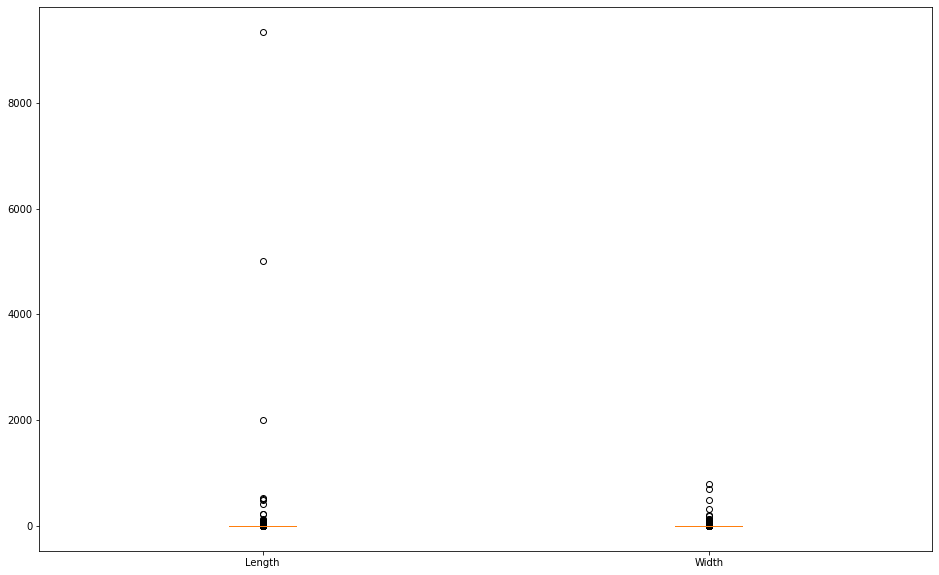

In [59]:
#Creating box plots separately for Length, Width and Depth

data=woundassessment6.dropna()

x1=data["Length"]
x2=data["Width"]
#x3=data["Depth"]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

data = [x1,x2]

fig, ax = plt.subplots(figsize=(16,10))
ax.boxplot(data, labels =["Length", "Width"])

plt.show()

## Three heavily high outliers can be seen for Wound Length, removing those.

In [60]:
for i in range(3):
    list_remove_index=[]
    outlier_length=woundassessment6["Length"].max()
    print(outlier_length)
#     for j in range(woundassessment6.shape[0]):
#         if woundassessment6.iloc[i][4] >= outlier_length:
    dff_out=woundassessment6.query("Length==@outlier_length")
    j=dff_out.index
    print(int(j.values))
    j=int(j.values)
    list_remove_index.append(j)
    woundassessment6.drop(list_remove_index,axis=0,inplace=True)

woundassessment6

9341.0
107118
5017.0
84366
2003.0
140668


,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209032,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209033,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209034,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209035,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


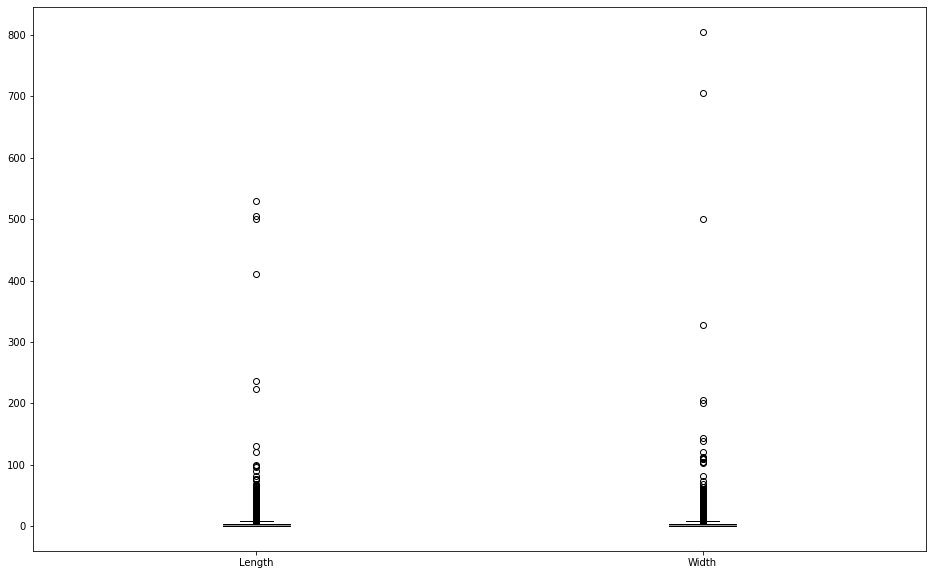

In [61]:
#Creating box plots separately for Length, Width and Depth

data=woundassessment6.dropna()

x1=data["Length"]
x2=data["Width"]
#x3=data["Depth"]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

data = [x1,x2]

fig, ax = plt.subplots(figsize=(16,10))
ax.boxplot(data, labels =["Length", "Width"])

plt.show()

In [62]:
woundassessment6=woundassessment6.reset_index(drop=True)
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209029,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209030,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209031,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209032,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


### Now let's remove the outliers in each Wound length and width as seen from the boxplot if the value is greater than 100

In [63]:
for i in range(100):
    outlier_width=woundassessment6["Width"].max()
    if outlier_width<100:
        break
    print(outlier_width)
#     for j in range(woundassessment6.shape[0]):
#         if woundassessment6.iloc[i][4] >= outlier_length:
    dff_out=woundassessment6.query("Width==@outlier_width")
    j=dff_out.index
    #print(int(j.values))
    #j=int(j.values)
    for k in range(j.shape[0]):
        list_remove_index=[]
        list_remove_index.append(j[k])
        woundassessment6.drop(list_remove_index,axis=0,inplace=True)

        
for i in range(100):
    outlier_length=woundassessment6["Length"].max()
    if outlier_length<100:
        break
    print(outlier_length)
#     for j in range(woundassessment6.shape[0]):
#         if woundassessment6.iloc[i][4] >= outlier_length:
    dff_out=woundassessment6.query("Length==@outlier_length")
    j=dff_out.index
    #print(int(j.values))
    #j=int(j.values)
    for k in range(j.shape[0]):
        list_remove_index=[]
        list_remove_index.append(j[k])
        woundassessment6.drop(list_remove_index,axis=0,inplace=True)

woundassessment6

805.0
705.0
501.0
328.0
206.0
200.0
143.0
138.0
120.0
112.0
111.0
110.0
105.0
103.0
530.0
505.0
410.0
236.0
224.0
131.0
120.8


,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209029,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209030,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209031,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209032,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


In [64]:
woundassessment6=woundassessment6.drop(["PatientDOB_New"],axis=1)
woundassessment6.reset_index(drop=True)
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,71.84
...,...,...,...,...,...,...,...,...,...
209029,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90
209030,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,42.33
209031,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,42.33
209032,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53


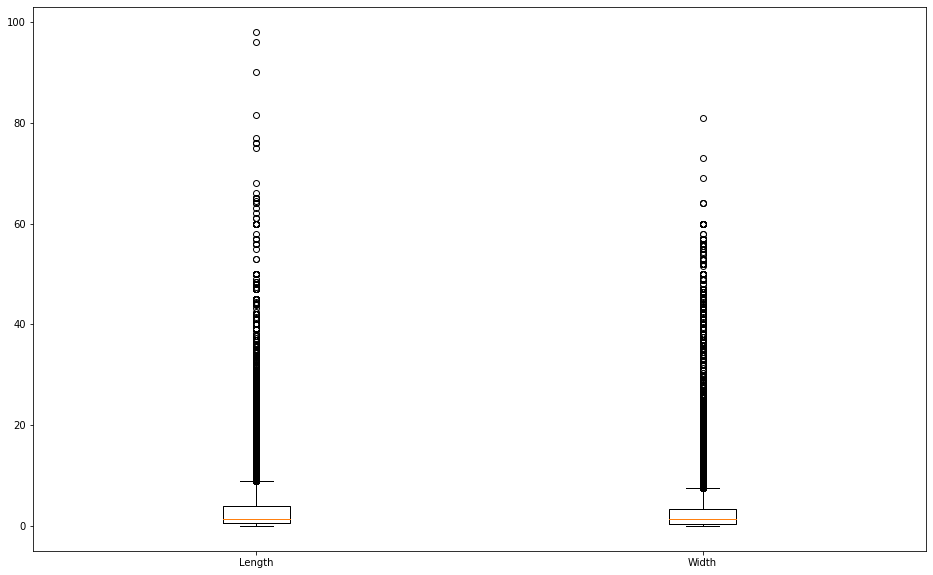

In [65]:
#Creating box plots separately for Length, Width and Depth

data=woundassessment6.dropna()

x1=data["Length"]
x2=data["Width"]
#x3=data["Depth"]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

data = [x1,x2]

fig, ax = plt.subplots(figsize=(16,10))
ax.boxplot(data, labels =["Length", "Width"])

plt.show()

In [66]:
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,71.84
...,...,...,...,...,...,...,...,...,...
209029,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90
209030,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,42.33
209031,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,42.33
209032,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53


In [67]:
woundassessment6=woundassessment6.reset_index()
woundassessment6=woundassessment6.drop(["index"],axis=1)
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,71.84
...,...,...,...,...,...,...,...,...,...
209005,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90
209006,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,42.33
209007,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,42.33
209008,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53


## checking the correlation

,Length,Width,Age
Length,1.000000,0.674297,-0.001001
Width,0.674297,1.000000,-0.003153
Age,-0.001001,-0.003153,1.000000


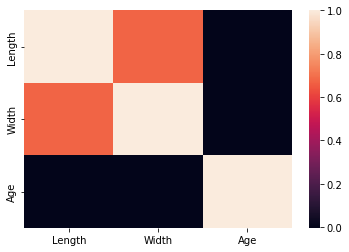

In [68]:
#Correlation plot

sns.heatmap(woundassessment6.corr())

woundassessment6.corr()

In [69]:
## Checking the IQR

data=woundassessment6

x1=data["Length"][~np.isnan(data["Length"])]
x2=data["Width"][~np.isnan(data["Width"])]
#x3=data["Depth"][~np.isnan(data["Depth"])]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

#data = [x1,x2,x3]
data=x1

print("IQR for Length:")
q1, q3 = np.percentile(x1,[25,75])
print("q1", q1, "q3",q3)

iqr=q3-q1
print("iqr", iqr)

lower_fence= q1-iqr*2
higher_fence= q3+ iqr*2
print("lower fence:", lower_fence, "higher fence:", higher_fence, "\n")

print("IQR for Width:")
q1, q3 = np.percentile(x2,[25,75])
print("q1", q1, "q3",q3)

iqr=q3-q1
print("iqr", iqr)

lower_fence= q1-iqr*2
higher_fence= q3+ iqr*2
print("lower fence:", lower_fence, "higher fence:", higher_fence, "\n")


# print("IQR for Depth:")
# q1, q3 = np.percentile(x3,[25,75])
# print("q1", q1, "q3",q3)

# iqr=q3-q1
# print("iqr", iqr)

# lower_fence= q1-iqr*2
# higher_fence= q3+ iqr*2
# print("lower fence:", lower_fence, "higher fence:", higher_fence)

IQR for Length:
q1 0.54 q3 3.9
iqr 3.36
lower fence: -6.18 higher fence: 10.62 

IQR for Width:
q1 0.5 q3 3.3
iqr 2.8
lower fence: -5.1 higher fence: 8.899999999999999 



## (Ignore) Removing the outlier

In [70]:
# dataframe_with_outliers= woundassessment6
# list_remove_index=[]
# for i in range(dataframe_with_outliers.shape[0]):
#     if dataframe_with_outliers.iloc[i][3] >= 10.8 or dataframe_with_outliers.iloc[i][4] >= 8.91:
#         list_remove_index.append(i)
#         print(i)
        
# dataframe_with_outliers.drop(list_remove_index,axis=0,inplace=True)
# dataframe_without_outliers= dataframe_with_outliers
# dataframe_without_outliers.head()

In [71]:
# dataframe_without_outliers=dataframe_without_outliers.reset_index(drop=True)
# dataframe_without_outliers

In [72]:
# #now checking the boxplots for all

# #Creating box plots separately for Length, Width and Depth

# data=dataframe_without_outliers.dropna()

# x1=data["Length"]
# x2=data["Width"]
# #x3=data["Depth"]

# x1=np.array(x1)
# x2=np.array(x2)
# #x3=np.array(x3)

# data = [x1,x2]

# fig, ax = plt.subplots(figsize=(16,10))
# ax.boxplot(data, labels =["Length", "Width"])

# plt.show()

## seeing through the histograms

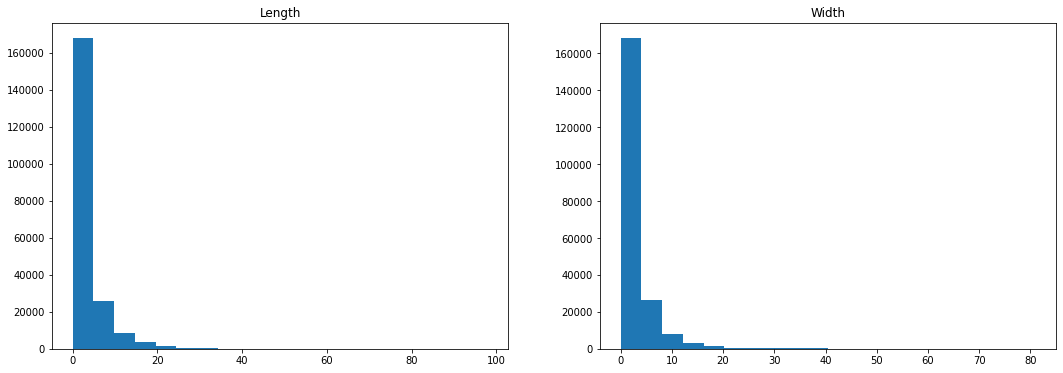

In [73]:
#data=dataframe_without_outliers

data=woundassessment6

x1=data["Length"]
x2=data["Width"]
#x3=data["Depth"]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

fig, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].hist(x1, bins=20)
ax[1].hist(x2, bins=20)
#ax[2].hist(x3, bins=20)

ax[0].set_title("Length")
ax[1].set_title("Width")
#ax[2].set_title("Depth")

plt.show()

# 11. Correlation plot

## checking the correlations

In [74]:
data=data.reset_index(drop=True)
data.head()

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.0,2.0,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.0,2.0,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.0,2.0,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.0,2.0,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.5,3.0,Unknown,Unknown,Unknown,71.84


<AxesSubplot:>

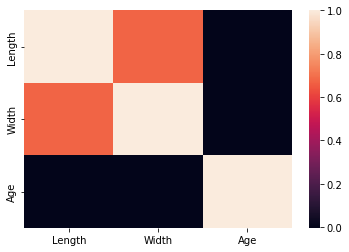

In [75]:
#Correlation plot

sns.heatmap(data.corr())

## Summary

In [76]:
woundassessment=data
df=data
df=df.sort_values(by=['PatientID'])
unique_patients=df["PatientID"].unique().tolist()

unique_wounds=0
for i in range(len(unique_patients)):
    patientID=unique_patients[i]
    df1=df.query("PatientID == @patientID")
    wounds=len(df1["WoundNumber"].unique())
    unique_wounds=unique_wounds+wounds
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069


3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718


5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367


6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007


8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489


In [78]:
print("Number of unique patients in the dataframe is", len(unique_patients))
#print("\n")
print("Number of unique wounds in the dataset",unique_wounds)
print("\n")
print("Value counts for Gender:")
print(woundassessment["PatientGender"].value_counts())
print("\n")
print("Value counts for Race:")
print(woundassessment["RaceCodeList"].value_counts())
print("\n")
print("Value counts for Ethnicity:")
print(woundassessment["patientEthnicity"].value_counts())

Number of unique patients in the dataframe is 8490
Number of unique wounds in the dataset 24420


Value counts for Gender:
M          119079
F           89780
Unknown       151
Name: PatientGender, dtype: int64


Value counts for Race:
Unknown                                      125282
White                                         65248
Black                                         17881
ASKU                                            323
Asian                                           207
American Indian or Alaska Native                 57
Native Hawaiian or Other Pacific Islander         8
Other                                             4
Name: RaceCodeList, dtype: int64


Value counts for Ethnicity:
Non-Hispanic        159295
Unknown              47463
Hispanic              2159
Patient Declined        91
ASKU                     2
Name: patientEthnicity, dtype: int64


In [80]:
data

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,71.84
...,...,...,...,...,...,...,...,...,...
209005,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90
209006,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,42.33
209007,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,42.33
209008,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53


# Merging with BMI and Smoking Status

In [ ]:
nutrition_assessment=pd.read_csv("tbl_PatientNutritionAssessmentInstance.csv",sep='|')
document_dict_patientid=pd.Series(documentlibrary.PatientID.values,index=documentlibrary.DocumentID).to_dict()
nutrition_assessment['PatientID'] = nutrition_assessment['DocumentID'].map(document_dict_patientid)
bmi=nutrition_assessment[["PatientID","BMI"]]
#bmi_dict=pd.Series(nutrition_assessment.BMI.values,index=.DocumentID).to_dict()
data_1=pd.merge(data,bmi,on="PatientID")
data_1

In [97]:
df_social_history=pd.read_csv("tbl_SocialHistoryPatientInstances.csv",sep="|")
document_dict_patientid=pd.Series(documentlibrary.PatientID.values,index=documentlibrary.DocumentID).to_dict()
df_social_history['PatientID'] = df_social_history['DocumentID'].map(document_dict_patientid)
df_social_history
smoking_status=df_social_history[["PatientID","SmokingStatus"]]
data_2=pd.merge(data_1,smoking_status,on="PatientID")
data_2

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age,BMI,SmokingStatus
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
1,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
2,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
3,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
4,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1726829,10219057.0,2023-01-09,2,4.05,6.11,M,White,Non-Hispanic,73.30,44.6,3.0
1726830,10219057.0,2023-01-09,2,4.16,5.59,M,White,Non-Hispanic,73.30,44.6,3.0
1726831,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90,19.7,3.0
1726832,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53,34.5,1.0


In [102]:
data_2.to_csv("2_data_for_imputation_may11.csv")